# 83강 특이값 분해 응용

- 이 문서는 미완성이다.
- 참고 사이트: [frankcleary.com주피터](https://www.frankcleary.com/svd/)의 글을 읽으면서 정리한다.
- 읽으면서 내가 이해한 바를 정리했는데 오류가 많을 것 같다.
- 이 포스트의 핵심 주제는 
    - 특이값 분해결과인 V의 앞부분 행과 U의 앞부분 열이 A행렬에 기여를 많이 한다.
    - 이런 내용을 다룬 문서가 없어서 부족하나마 일단 정리해둔다.   

## TOC
- 개요

### TODO
- 테스트용 데이터가 없어서 프로그램을 실행해보지 못했다. 
- 나중에 유사한 데이터를 만들어서 테스트해봐야 겠다.
- 그래서 미완성이다.

## 해석
- 특이값 분해가 선형대수의 관점에서 흥미롭지만, 여기서는 응용에 초점을 맞추고, 기하학적 해석이나 유도는 생략한다.

- A는 $m \times n$행렬이고 $A=[a_1, a_2, \cdots a_n]$이다. $a_i$는 열벡터

- A의 특이값 분해 결과인 U는 $m \times m$, Σ는 $m \times n$, V는 $n \times n$이다.

- Σ가 대각행렬이므로 $a_i = u_1\,\sigma_1\,V_{1,i} + u_2\,\sigma_2\,V_{2,i} + \cdots = U \, \Sigma \, v_i $

- Σ행렬의 특이값은 큰 순서로 정렬되어 있다. $\sigma_1 \gt \sigma_2 \gt \sigma_3 \gt \cdots $

- 눈으로 쉽게 확인하기 위해 행렬을 복잡하게 풀어서 썼다.

$$
\begin{bmatrix}
    u_{11} & u_{12} & u_{13} \\
    u_{21} & u_{22} & u_{23} \\
    u_{31} & u_{32} & u_{33} \\
\end{bmatrix}
\begin{bmatrix}
    \sigma_1 & 0        \\
    0        & \sigma_2 \\
    0        & 0        \\
\end{bmatrix}
\begin{bmatrix}
    v_{11} & v_{12}  \\
    v_{21} & v_{22}  \\
\end{bmatrix}
=
\begin{bmatrix}
    u_{11} \sigma_1 v_{11} + u_{12} \sigma_2 v_{21} &  u_{11} \sigma_1 v_{12} + u_{12} \sigma_2 v_{22}  \\
    u_{21} \sigma_1 v_{11} + u_{22} \sigma_2 v_{21} &  u_{21} \sigma_1 v_{12} + u_{22} \sigma_2 v_{22}  \\
    u_{31} \sigma_1 v_{11} + u_{32} \sigma_2 v_{21} &  u_{31} \sigma_1 v_{12} + u_{32} \sigma_2 v_{22}  \\
\end{bmatrix} 
=
\begin{bmatrix}
    a_{11} & a_{12}  \\
    a_{21} & a_{22}  \\
    a_{31} & a_{32}  \\
\end{bmatrix}
$$

#### 기여를 누가 많이 하는가?
- $\sigma_1$이 A행렬의 각 요소에 골고루 곱해져 있음을 볼 수 있다.
- 여기서 $\sigma_1$과 곱해지는 것은 V의 1행들과 U의 1열들뿐임을 알 수 있다.
- **이것은 V의 1행과 U의 1열이 A의 최종값에 많이 기여함을 의미한다.**

#### V의 열은 A의 열을 정의한다.
- 또 V의 1열은 A의 1열에만 더해지지, A의 다른 열에는 기여하지 않는다.
- V의 2열은 A의 2열에만 더해진다.
- 따라서 V의 열은 A의 열을 정의한다.

#### U의 행은 A의 행을 정의한다.
- 또 U의 1행은 A의 1행에만 더해지지, A의 다른 행에는 기여하지 않는다.
- U의 2행은 A의 2행에만 더해진다.
- 따라서 U의 행은 A의 행을 정의한다.


## Brief discussion of dimensionality
- 만약 A가 $m \times n$이면, U는 $m \times n$, Σ는 $m \times n$, V는 $n \times n$이다.
- Σ에는 0이 아닌 값이 r=rank(A)개 만큼 있다. 
- 그러므로 U의 열벡터중 r번째 이후의 열벡터는 A에 기여하지 못한다.
- 마찬가지로 V의 행벡터중 r번째 이후의 행벡터는 A에 기여하지 못한다.
- 그러므로 U는 $m \times r$, Σ는 $r \times r$, V는 $r \times n$ 부분만 남기고 나머지는 모두 생략한다.

## Example with data
- 특이값 분해는 유사한 객체들을 분류하는 용도로 사용할 있다.
- 예를 들어보자.

>4개의 블로그 포스트가 있는데, 두개는 스키에 대한 내용이고, 두개는 하키에 대한 내용을 담고 있다. 


- 다섯 단어에 대해, 각 포스트들이 언급한 횟수에 대한 데이터를 만들었다.

In [1]:
import pandas as pd

c_names = ['post1', 'post2', 'post3', 'post4']
words = ['ice', 'snow', 'tahoe', 'goal', 'puck']
post_words = pd.DataFrame([[4, 4, 6, 2],
                           [6, 1, 0, 5],
                           [3, 0, 0, 5],
                           [0, 6, 5, 1],
                           [0, 4, 5, 0]],
                          index = words,
                          columns = c_names)
post_words.index.names = ['word:']
post_words

,post1,post2,post3,post4
word:,,,,
ice,4,4,6,2
snow,6,1,0,5
tahoe,3,0,0,5
goal,0,6,5,1
puck,0,4,5,0


- 1,4번 포스트는 스키, 2,3번 포스트는 하키에 대한 내용인 것 같다.
- 위의 DataFrame을 행렬 A로 두고, 행렬 요소의 값은 포스트에서 언급한 횟수를 의미한다.
- 넘파이를 사용해 A행렬에 대해 특이값분해를 해보자.

In [4]:
import numpy as np
U, sigma, V = np.linalg.svd(post_words)
print('V = \n', np.round(V, decimals=2))

V = 
 [[-0.4  -0.57 -0.63 -0.35]
 [-0.6   0.33  0.41 -0.6 ]
 [ 0.6  -0.41  0.32 -0.61]
 [-0.34 -0.63  0.58  0.39]]


V의 결과가 4행 4열로 나오는데,
V의 4열은 최종 행렬 A의 4열을 정의하므로
V의 4열은 A의 4열과 같은 종류이다.

In [5]:
V_df = pd.DataFrame(V, columns=c_names)
V_df

,post1,post2,post3,post4
0,-0.395634,-0.570869,-0.630100,-0.347212
1,-0.599836,0.331743,0.408279,-0.602870
2,0.604001,-0.405353,0.321932,-0.605996
3,-0.344752,-0.632253,0.576751,0.385695


- V의 처음 2행에서 포스트 1과 4는
    - 값이 큰 차이가 없음을 볼 수 있다.
    - 이것은 포스트 1과 4에 유사한 단어가 포함되어 있음을 나타낸다.
    - 여기서는 스키 관련 단어이겠다.
- V의 처음 2행에서 포스트 2과 3는
    - 값이 큰 차이가 없음을 볼 수 있다.
    - 이것은 포스트 2와 3에 유사한 단어가 포함되어 있음을 나타낸다.
    
- 그러나 마지막 두 행은 덜 일치한다. 
- 왜냐하면 마지막 두 행의 가중치인 $\sigma_3, \sigma_4$는 $\sigma_1, \sigma_2$에 비해 작기 때문이다.

- $\sigma$의 값을 확인해보자.


In [7]:
sigma

array([13.3221948 ,  9.2609512 ,  2.41918664,  1.37892883])

- $\sigma$의 크기는 $\sigma_1 \ge \sigma_2 \ge \sigma_3 \ge \sigma_4$ 순이고,
- V의 처음 두 행의 값이 마지막 두 행의 값보다 훨씬 더 중요하다는 것을 나타낸다.
- 사실 V의 처음 두행과 U의 처음 두열만으로도 A를 정의할 수 있다. A는 최대 1단어 오류를 갖는다.

In [13]:
A_approx = np.matrix(U[:, :2]) * np.diag(sigma[:2]) * np.matrix(V[:2, :])
print('처음 2행만 사용하여 재구성한 행렬')
print(A_approx)
print('\n실제 값과의 차이(에러)')
print(post_words - A_approx)

처음 2행만 사용하여 재구성한 행렬
[[ 3.19708412  4.81855605  5.32573599  2.79267497]
 [ 5.61979298  0.58820097  0.38467542  5.41220366]
 [ 4.04394318  0.07166455 -0.12363886  3.91701473]
 [ 0.68211703  5.08962774  5.76212157  0.33649133]
 [ 0.12939801  4.21952303  4.79918534 -0.14394602]]

실제 값과의 차이(에러)
          post1     post2     post3     post4
word:                                        
ice    0.802916 -0.818556  0.674264 -0.792675
snow   0.380207  0.411799 -0.384675 -0.412204
tahoe -1.043943 -0.071665  0.123639  1.082985
goal  -0.682117  0.910372 -0.762122  0.663509
puck  -0.129398 -0.219523  0.200815  0.143946


- 포스트간의 유사성을 시각화하기 위해 V를 이미지로써 표시해보자.
- 처음 두 줄에서 유사한 포스트들은 유사한 컬러를 갖는지 확인해 보라.

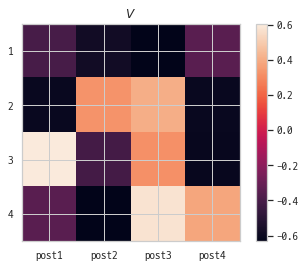

In [16]:
plt.imshow(V, interpolation='none')
plt.xticks(range(len(c_names)))
plt.yticks(range(len(words)))
plt.ylim([len(words) - 1.5, -.5])
ax = plt.gca()
ax.set_xticklabels(c_names)
ax.set_yticklabels(range(1, len(words) + 1))
plt.title("$V$")
plt.colorbar();

- SVD가 알려주는 또 다른 것은, 포스트의 카테고리이다.
- V의 두번째 행에서 스키 포스트들은 하키 포스트들과 매우 다른 것을 볼 수 있다.
- V의 두번째 행은, U의 두번째 열이 최종 값에 얼마나 영향을 주느냐에 따라 달라진다.
    - V의 두번째 행과 곱해지는 것은 U의 두번째 열이다.

- 아래는 U의 두 번째 열이다.

In [17]:
pd.DataFrame(U[:,1], index=words)


,0
ice,0.018526
snow,-0.678291
tahoe,-0.519801
goal,0.370263
puck,0.363717


- 위 데이터는 (snow, tahoe)과 (goal,puck)과 매우 차이가 나는 것을 볼 수 있다.
- 이 작은 데이터에서 우리는 적어도 이런 결론을 내릴 수 있다.
- snow,tahoe 단어가 goal,puck 단어로부터 다른 분류를 한다.